<a href="https://colab.research.google.com/github/aman2802/Deep-Learning/blob/master/FashionDx_improvised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator

import pathlib
#data_dir = tf.keras.utils.get_file(origin="/content/drive/My Drive/FDx Data/Training Set", fname='cloth_photos', untar=False)
#data_dir = pathlib.Path("/content/drive/My Drive/FDx Data/Training Set")
data_dir = "/content/drive/My Drive/FDx Data/Training Set"
#TRAIN_DIR = '/content/drive/My Drive/FDx Data/Training Set'
#TEST_DIR = '/content/drive/My Drive/FDx Data/Test'


Using TensorFlow backend.


In [ ]:
!pip install split-folders tqdm

In [ ]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio(data_dir, output=data_dir, seed=1337, ratio=(.8, .2)) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#split_folders.fixed('input_folder', output="output", seed=1337, fixed=(100, 100), oversample=False) # default values

In [ ]:
train_dir = "/content/drive/My Drive/FDx Data/Training Set/train"
val_dir = "/content/drive/My Drive/FDx Data/Training Set/val"
train_dir = pathlib.Path(train_dir)
val_dir = pathlib.Path(val_dir)

test_dir = "/content/drive/My Drive/FDx Data/Test"
test_dir = pathlib.Path(test_dir)

In [ ]:
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['checks', 'stripes', 'solids'], dtype='<U7')

In [ ]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].

#image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2) #Without Data Augmentation

#image_generator_augment1 = ImageDataGenerator(
#                    rescale=1./255,
#                    width_shift_range=.15,
#                    height_shift_range=.15
#                    )
image_generator_augment2 = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_generator = ImageDataGenerator(
                    rescale=1./255,
                    )

In [ ]:
train_count = len(list(train_dir.glob('*/*.jpg')))
val_count = len(list(val_dir.glob('*/*.jpg')))
print("Training:", train_count)
print("Validation:", val_count)

Training: 658
Validation: 166


In [ ]:
BATCH_SIZE = 32
EPOCHS = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150
STEPS_PER_EPOCH = (round(train_count))//BATCH_SIZE

In [ ]:
train_data_gen = image_generator_augment2.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

val_data_gen = image_generator.flow_from_directory(directory=str(val_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

test_data_gen = image_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 664 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

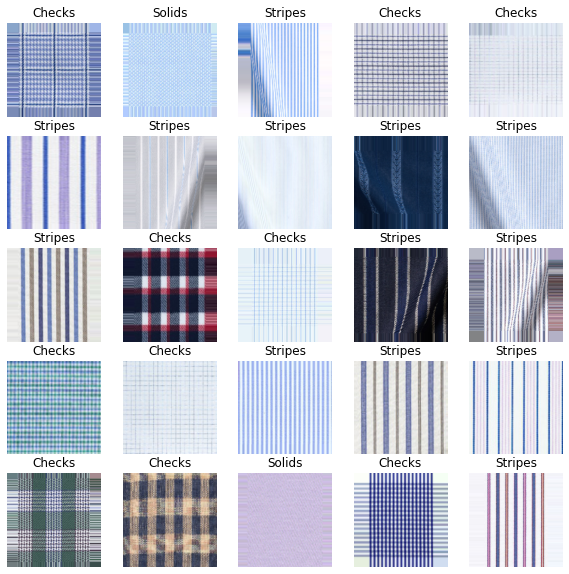

In [ ]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

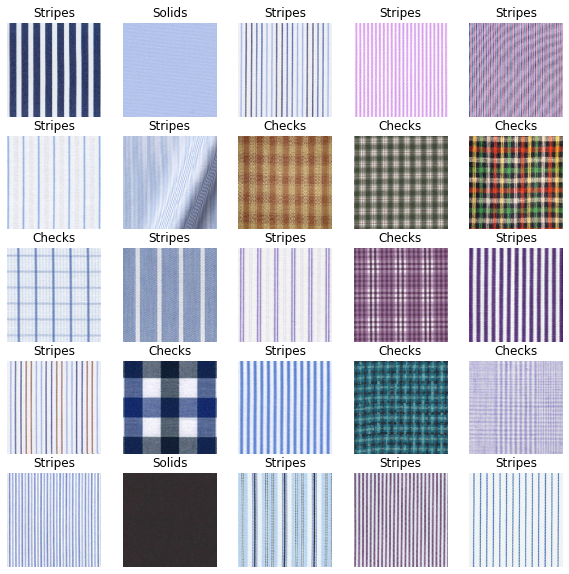

In [ ]:
image_batch, label_batch = next(val_data_gen)
show_batch(image_batch, label_batch)

In [ ]:
from keras import layers
from keras import models

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 34, 32)       

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=val_count// BATCH_SIZE
)

Epoch 1/20
20/20 [==============================] - 342s 17s/step - loss: 1.4718 - accuracy: 0.4589 - val_loss: 0.8922 - val_accuracy: 0.4500
Epoch 2/20
20/20 [==============================] - 23s 1s/step - loss: 0.9819 - accuracy: 0.4842 - val_loss: 0.9224 - val_accuracy: 0.5333
Epoch 3/20
20/20 [==============================] - 6s 280ms/step - loss: 0.9696 - accuracy: 0.5079 - val_loss: 0.8579 - val_accuracy: 0.5778
Epoch 4/20
20/20 [==============================] - 5s 267ms/step - loss: 0.9631 - accuracy: 0.5269 - val_loss: 0.9727 - val_accuracy: 0.5111
Epoch 5/20
20/20 [==============================] - 5s 274ms/step - loss: 0.9897 - accuracy: 0.5506 - val_loss: 0.8953 - val_accuracy: 0.6296
Epoch 6/20
20/20 [==============================] - 6s 276ms/step - loss: 0.8879 - accuracy: 0.5594 - val_loss: 0.8786 - val_accuracy: 0.4667
Epoch 7/20
20/20 [==============================] - 6s 275ms/step - loss: 0.9171 - accuracy: 0.5332 - val_loss: 1.1255 - val_accuracy: 0.4625
Epoch 8/

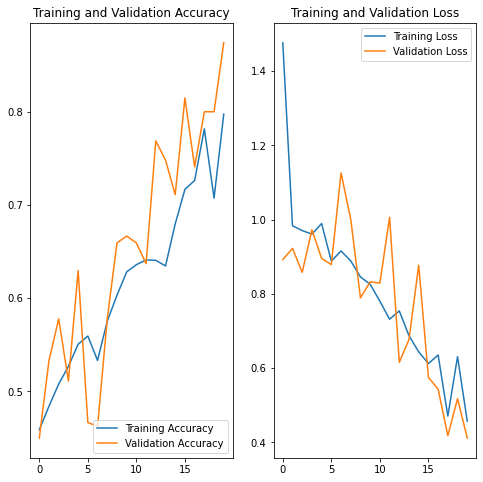

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
!pip3 install autokeras

In [ ]:
from autokeras import load_image_dataset

#(x_train, y_train), (x_test, y_test) = load_image_dataset('/path/to/your/dataset', ['Training_Set', 'Test_Set'])
(x_test, y_test) = load_image_dataset('/content/drive/My Drive/FDx Data/Test', ['Test_Set'])

ImportError: ignored

In [ ]:
# evaluate model
loss = model.evaluate_generator(test_data_gen, steps=12)

In [ ]:
# make a prediction
yhat = model.predict_generator(test_data_gen, steps=1)

In [ ]:
yhat

array([[9.8856622e-01, 1.1423121e-02, 1.0770003e-05],
       [2.8926417e-01, 4.7219130e-01, 2.3854448e-01],
       [1.2198838e-01, 8.7769431e-01, 3.1736557e-04],
       [2.9919982e-01, 4.1906238e-01, 2.8173772e-01],
       [9.6977150e-01, 2.7919177e-02, 2.3093356e-03],
       [3.1853893e-01, 3.5806996e-01, 3.2339114e-01],
       [9.9038273e-01, 9.5298272e-03, 8.7456821e-05],
       [3.0676314e-01, 3.8659623e-01, 3.0664065e-01],
       [2.2594993e-01, 7.6969707e-01, 4.3530744e-03],
       [3.1405348e-01, 3.7463236e-01, 3.1131417e-01],
       [4.4329801e-01, 2.4998736e-01, 3.0671468e-01],
       [7.7170914e-01, 1.4042369e-01, 8.7867208e-02]], dtype=float32)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


numpy.ndarray

In [ ]:
#LATER after making test set
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
type(test_data_gen)

keras.preprocessing.image.DirectoryIterator